In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
import plotly
import plotly.express as px
import statistics

 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений

In [2]:
chem_data = pd.read_csv('train-2.csv')

Выводим первые 5 строк таблицы

In [3]:
chem_data.head()

,SMILES,activity
0,OCC=C,5.0
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4
3,CCCCC(CC)C(O)=O,-8.2
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2


Выводим последние 5 строк таблицы

In [4]:
chem_data.tail()

,SMILES,activity
754,CC1=CC2=CC=CN=C2C=C1,43.1
755,C12CC[C@@](O)(C#C)[C@@]1(C)CCC3C4CCC(=O)C=C4CCC23,15.8
756,CCCCNS(=O)(=O)C1=CC=CC=C1,17.8
757,NC1=C(Cl)C(Cl)=NC(C(O)=O)=C1Cl,55.1
758,CCOC1=CC(OC2=CC=C(C=C2Cl)C(F)(F)F)=CC=C1[N+]([...,59.8


Выведем информацию о таблице

In [5]:
chem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    759 non-null    object 
 1   activity  759 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 550.3 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 104.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 332.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 645.2 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import deepchem as dc

Skipped loading some Pytorch utilities, missing a dependency. No module named 'torch'


This module requires PyTorch to be installed.


No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [39]:
train = chem_data.copy()


In [35]:
from rdkit import Chem
from rdkit.Chem import AllChem

SMILES – это форма записи молекулы текстом. Модели не понимают текст (если мы не говорим о специальных моделях), поэтому текст нужно превратить в числа. Один из способов превратить молекулы в числа – это fingerprints.

In [40]:
def smiles_to_fp(smiles):
    '''Convert SMILES to Morgan fingerprints'''
    return np.array([AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=1024) for s in smiles])

X_train = smiles_to_fp(train.SMILES)

[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerator
[20:35:52] DEPRECATION WARNING: please use MorganGenerat

Выводим информацию о таблице

In [41]:
X_train.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [42]:
train.head()

,SMILES,activity
0,OCC=C,5.0
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4
3,CCCCC(CC)C(O)=O,-8.2
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2


In [45]:
#Оцениваем наличие или отсутствие пропусков в данных
train.isnull().sum() 

SMILES      0
activity    0
dtype: int64

In [46]:
#Оцениваем наличие или отсутствие дубликатов в данных
print ("Duplicate values in df are:" , train.duplicated().sum()) 


Duplicate values in df are: 0


Пропусков и дубликатов в данных нет

In [47]:
# Оцениваем базовую статистику
print(train.describe())

         activity
count  759.000000
mean    40.691304
std     36.150662
min    -38.300000
25%     10.750000
50%     30.100000
75%     69.550000
max    111.000000


Визуализируем распределение активности соединений

In [49]:
fig = px.histogram(
    data_frame=train,
    x = 'activity',
    title = 'Распределение активности соединений'
)
fig.update_layout(bargap=0.2)
fig.update_layout(xaxis_title = 'Активность', yaxis_title = 'Химические соединения')
fig.show()

In [50]:
fig = px.box(
    data_frame=train,
    x = 'activity',
    title = 'Распределение активности соединений'
)
fig.update_layout(xaxis_title = 'Активность', yaxis_title = 'Химические соединения')
fig.show()

Активность соединений не может быть меньше нуля - уберем их данных соединения с меньшей нуля активностью

In [51]:
train1 = train[train['activity']>0]

Оставили только вещества с активностью более 0

In [52]:
fig = px.box(
    data_frame=train1,
    x = 'activity',
    title = 'Распределение активности соединений'
)
fig.update_layout(xaxis_title = 'Активность', yaxis_title = 'Химические соединения')
fig.show()

In [57]:
from rdkit.Chem import PandasTools

Добавляем в таблицу столбец с объектами молекул с fingerprints

In [64]:
PandasTools.AddMoleculeColumnToFrame(train1, smilesCol='SMILES', molCol='MoleculeFinger', includeFingerprints=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rdkit/Chem/PandasTools.py:378: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 0 to 758
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SMILES          710 non-null    object 
 1   activity        710 non-null    float64
 2   MoleculeFinger  710 non-null    object 
dtypes: float64(1), object(2)
memory usage: 22.2+ KB


In [66]:
train1.head()

,SMILES,activity,MoleculeFinger
0,OCC=C,5.0,<rdkit.Chem.rdchem.Mol object at 0x14ddc7220>
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0,<rdkit.Chem.rdchem.Mol object at 0x14ddc73e0>
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4,<rdkit.Chem.rdchem.Mol object at 0x14ddc70d0>
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2,<rdkit.Chem.rdchem.Mol object at 0x14ddc6880>
5,CCC(C)(C)C1=CC=C(O)C=C1,91.2,<rdkit.Chem.rdchem.Mol object at 0x14ddc6960>


Удалим этот столбец, потому что я нашел фишку покруче

In [69]:
train1.drop(columns='MoleculeFinger')

,SMILES,activity
0,OCC=C,5.0
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2
5,CCC(C)(C)C1=CC=C(O)C=C1,91.2
...,...,...
754,CC1=CC2=CC=CN=C2C=C1,43.1
755,C12CC[C@@](O)(C#C)[C@@]1(C)CCC3C4CCC(=O)C=C4CCC23,15.8
756,CCCCNS(=O)(=O)C1=CC=CC=C1,17.8
757,NC1=C(Cl)C(Cl)=NC(C(O)=O)=C1Cl,55.1


Добавим лучше информацию по молекуле из другой формулы:

In [71]:
#Импортируем модуль
from rdkit import Chem 

#Трансформируем в объект молекулы SMILES
train1['mol'] = train1['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 

#Что мы получили - объект класса rdkit.Chem.rdchem.Mol
print(type(train1['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/3391838174.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Добавим в таблицу данные о наличии количество атомов и количества тяжелых атомов в изучаемых соединениях

In [75]:
train1['mol'] = train1['mol'].apply(lambda x: Chem.AddHs(x))
train1['num_of_atoms'] = train1['mol'].apply(lambda x: x.GetNumAtoms())
train1['num_of_heavy_atoms'] = train1['mol'].apply(lambda x: x.GetNumHeavyAtoms())

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/4090988561.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/4090988561.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/4090988561.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Посмотрим на зависимость токсичности от количество атомов и тяжелых атомов

In [77]:
fig = px.scatter(
    data_frame=train1,
    x = 'activity',
    y = 'num_of_atoms',
    title = 'Зависимость активности от количества атомов'
)
fig.update_layout(xaxis_title = 'Активность', yaxis_title = 'Количество атомов')
fig.show()

In [78]:
fig = px.scatter(
    data_frame=train1,
    x = 'activity',
    y = 'num_of_heavy_atoms',
    title = 'Зависимость активности от количества тяжелых атомов'
)
fig.update_layout(xaxis_title = 'Активность', yaxis_title = 'Количество тяжелых атомов')
fig.show()

Выраженной зависимости активности (токсичности) соединения от количества тяжелых или обычных атомов не выявлено

In [79]:
fig = px.box(
    data_frame=train1,
    x = 'num_of_atoms',
    title = 'Распределение по количеству атомов соединений'
)
fig.update_layout(xaxis_title = 'Количество атомов', yaxis_title = 'Химические соединения')
fig.show()

In [80]:
fig = px.box(
    data_frame=train1,
    x = 'num_of_heavy_atoms',
    title = 'Распределение по количеству тяжелых атомов соединений'
)
fig.update_layout(xaxis_title = 'Количество тяжелых атомов', yaxis_title = 'Химические соединения')
fig.show()

В основном, все соединения имеют от нескольких до 70 атомов, а также до 40 тяжелых атомов. Количество их скорее всего не коррелирует с токсичностью соединений

In [81]:
#на всякий случай сделаем копию таблицы
train2 = train1.copy()

Будем считать номера наиболее распространенных атомов в молекулах с помощью GetSubstructMatches()

Список атомов получили из статьи с токсичными атомами в соединениях:
https://www.ase.org.uk/system/files/SSR_December_2019_070-076_Sosabowski.pdf

In [86]:

def number_of_atoms(atom_list, df):
    """Функция, которая добавляет в датафрейм столбцы с количеством встречаемых атомов в веществах

    Args:
        atom_list (_type_): список из интересующих атомов
        df (_type_): датафрейм
    """
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl', 'Hg', 'Se', 'Te', 'Pu', 'Pb', 'I', 'F', 'As', 'Cd', 'Br'], train1)

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/2598667215.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/2598667215.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/2598667215.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

ArgumentError: Python argument types in
    Mol.GetSubstructMatches(Mol, NoneType)
did not match C++ signature:
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)

Получили ошибку, тк метод в rdkit возвращает только распространенные атомы, к сожалению

In [87]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 0 to 758
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SMILES              710 non-null    object 
 1   activity            710 non-null    float64
 2   MoleculeFinger      710 non-null    object 
 3   mol                 710 non-null    object 
 4   num_of_atoms        710 non-null    int64  
 5   num_of_heavy_atoms  710 non-null    int64  
 6   num_of_C_atoms      710 non-null    int64  
 7   num_of_O_atoms      710 non-null    int64  
 8   num_of_N_atoms      710 non-null    int64  
 9   num_of_Cl_atoms     710 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 77.2+ KB


Но в таблицу добавились распространенные атомы

Посмотрим распределения этих атомов и их зависимость от токсичности соединений

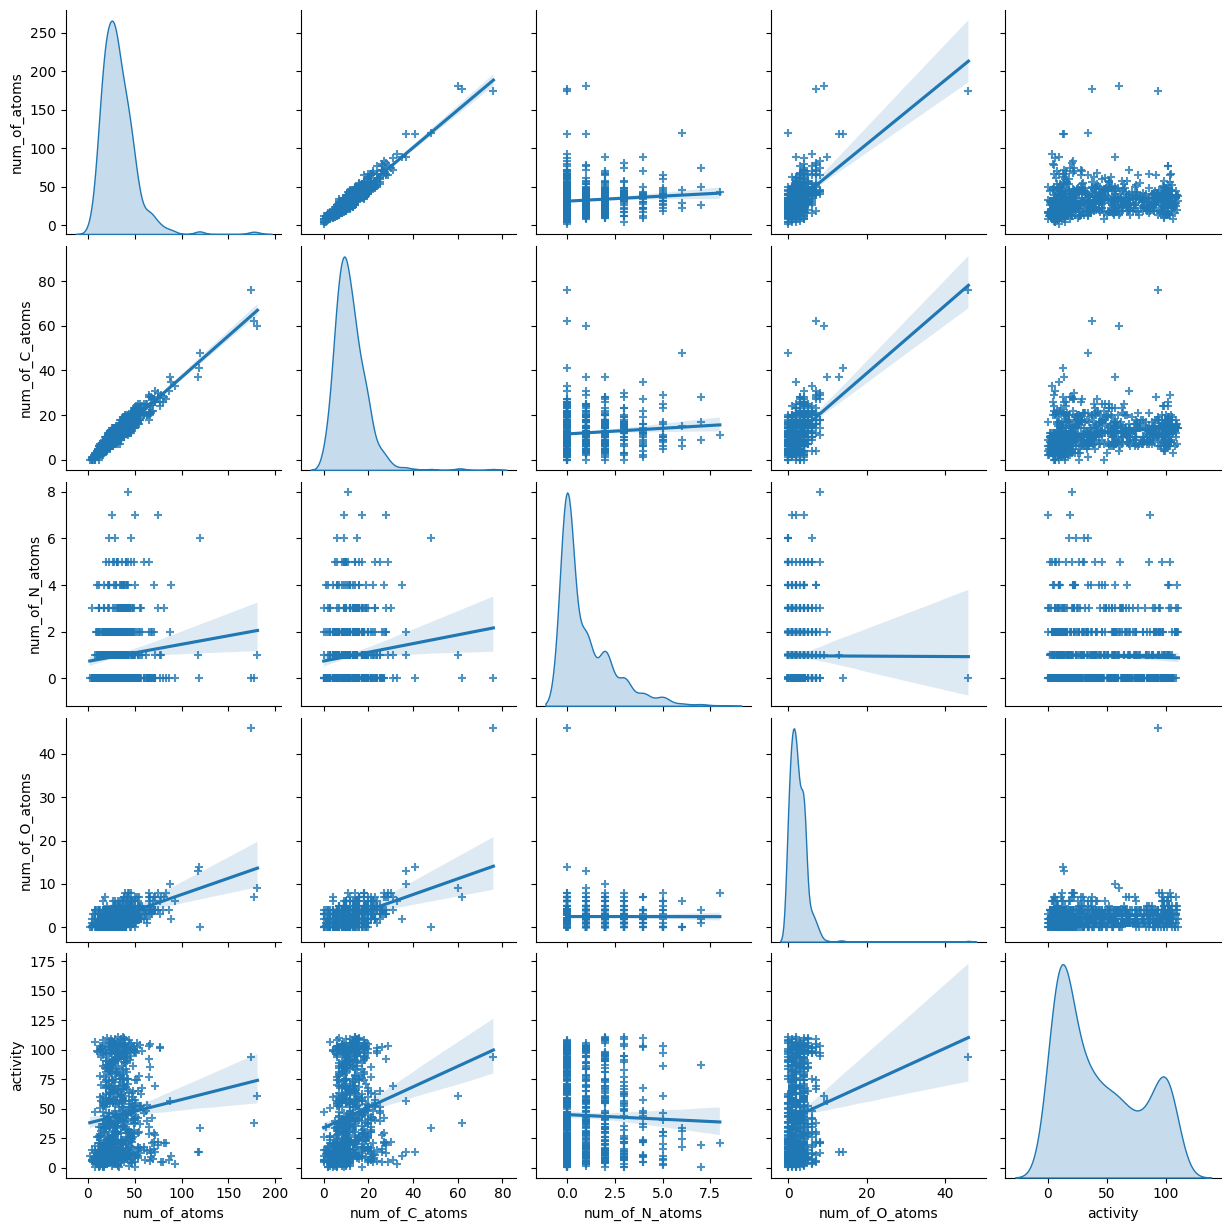

In [88]:
sns.pairplot(train1[['num_of_atoms','num_of_C_atoms','num_of_N_atoms', 'num_of_O_atoms', 'activity']], diag_kind='kde', kind='reg', markers='+')
plt.show()

Токсичность умеренно растет при росте количества атомов, больше растет при росте количества атомов углерода и кислорода

Добавим также параметры из пакета rdkit.Chem.Descriptors
Будем Использовать:  

rdkit.Chem.Descriptors.TPSA() - сумма поверхности всех полярных атомов или молекул, включая молекулы водорода 

rdkit.Chem.Descriptors.ExactMolWt() - молекулярная масса вещества;  

rdkit.Chem.Descriptors.NumValenceElectrons() - число валентности атомов (отражает электронную плотность вещества)  

rdkit.Chem.Descriptors.NumHeteroatoms() - общее число НЕуглеродных атомов в веществе.

In [89]:
from rdkit.Chem import Descriptors
train1['tpsa'] = train1['mol'].apply(lambda x: Descriptors.TPSA(x))
train1['mol_w'] = train1['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
train1['num_valence_electrons'] = train1['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
train1['num_heteroatoms'] = train1['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/2963351166.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/2963351166.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/jp1hw85s38l1bmw7sq7t71g00000gn/T/ipykernel_69890/2963351166.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [90]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 0 to 758
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SMILES                 710 non-null    object 
 1   activity               710 non-null    float64
 2   MoleculeFinger         710 non-null    object 
 3   mol                    710 non-null    object 
 4   num_of_atoms           710 non-null    int64  
 5   num_of_heavy_atoms     710 non-null    int64  
 6   num_of_C_atoms         710 non-null    int64  
 7   num_of_O_atoms         710 non-null    int64  
 8   num_of_N_atoms         710 non-null    int64  
 9   num_of_Cl_atoms        710 non-null    int64  
 10  tpsa                   710 non-null    float64
 11  mol_w                  710 non-null    float64
 12  num_valence_electrons  710 non-null    int64  
 13  num_heteroatoms        710 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 99.4+ KB


Визуализируем корреляционную матрицу признаков, для начала удалим ненужные теперь признаки после разложения молекул на различные параметры

In [103]:
train3 = train1.drop(columns=['MoleculeFinger', 'mol'])

In [112]:
types = train3.dtypes
numerical_columns = list(types[(types != 'object')].index)

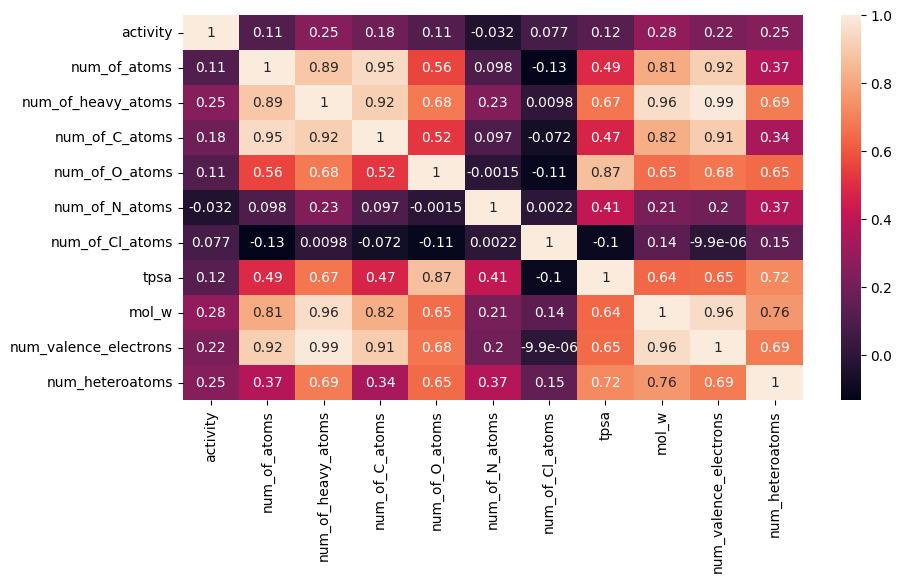

In [114]:

plt.figure(figsize = (10, 5))
sns.heatmap(train3[numerical_columns].corr(), annot = True);

Есть мультиколлинеарность - нужно избавиться от признаков "количество тяжелых атомов", "число валентности электронов".

In [115]:
train3 = train3.drop(columns=['num_of_heavy_atoms', 'num_valence_electrons'])

In [117]:
types = train3.dtypes
numerical_columns = list(types[(types != 'object')].index)

Повторим анализ корреляций

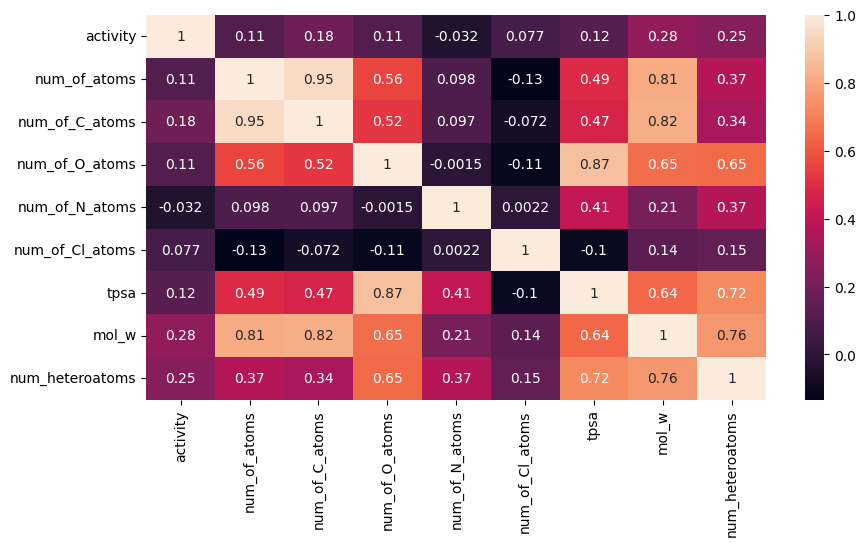

In [118]:

plt.figure(figsize = (10, 5))
sns.heatmap(train3[numerical_columns].corr(), annot = True);

Все еще остается мультиколлинеарность из-за совпадения количества атомов и количества углеродных атомов. Так как ранее на диаграммах рассеяния мы увидели большую корреляцию токсичности с атомами углерода - удаляем общее количество атомов. Более прецизионный расчет получим.

In [119]:
train3 = train3.drop(columns=['num_of_atoms'])

In [120]:
types = train3.dtypes
numerical_columns = list(types[(types != 'object')].index)

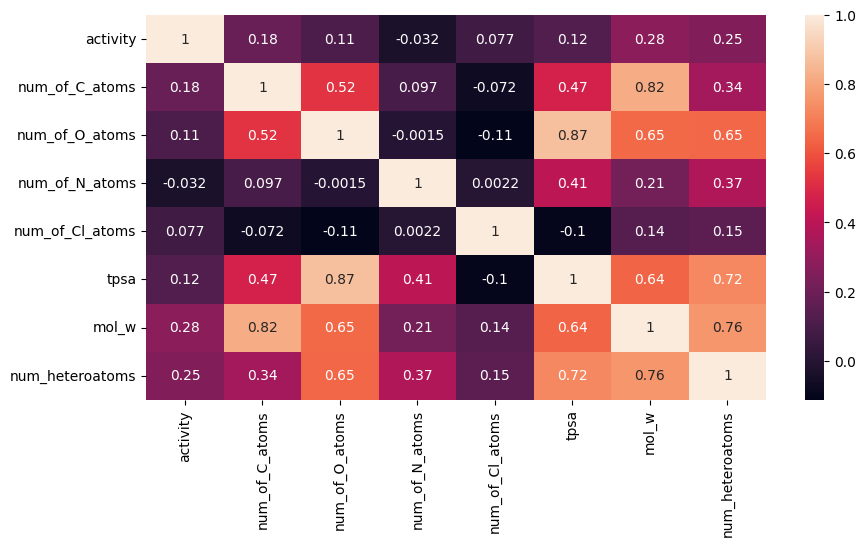

In [121]:

plt.figure(figsize = (10, 5))
sns.heatmap(train3[numerical_columns].corr(), annot = True);

Допустимые значения корреляций между признаками

Начинаем создавать модель регрессии c учетом хорошо коррелируемых признаков

In [124]:
needed_features = ['num_of_C_atoms', 'num_of_O_atoms', 'tpsa', 'mol_w', 'num_heteroatoms']
X = train3[needed_features]
y = train3['activity']

In [125]:
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики


In [131]:
from sklearn.preprocessing import StandardScaler
#Инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X_scaled = scaler.fit_transform(X)

Попробуем линейную регрессию

In [143]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=lr_model, #модель
    X=X_scaled, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='neg_mean_absolute_error', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)
print('Среднее значение RMSE на тестовой выборке: {}'.format(cv_metrics['test_score'].mean()))

{'fit_time': array([0.01809692, 0.00074792, 0.00542688, 0.00126886, 0.00047302]),
 'score_time': array([0.0008781 , 0.00022411, 0.00042391, 0.00030017, 0.0001862 ]),
 'test_score': array([-28.70592396, -28.1930105 , -29.32533281, -29.43694737,
        -26.48977485]),
 'train_score': array([-28.03587661, -28.28535788, -27.94400058, -28.10769785,
        -28.7119376 ])}

Среднее значение RMSE на тестовой выборке: -28.430197899284828


In [136]:
from sklearn import preprocessing
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_scaled)
#Генерируем полиномиальные признаки для выборки
X_scaled_poly = poly.transform(X_scaled)


In [142]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=lasso_lr_poly, #модель
    X=X_scaled_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='neg_mean_absolute_error', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)
print('Среднее значение RMSE на тестовой выборке: {}'.format(cv_metrics['test_score'].mean()))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e+05, tolerance: 6.745e+01

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.119e+05, tolerance: 6.667e+01

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

{'fit_time': array([0.012887  , 0.02227616, 0.01145005, 0.01733088, 0.01423478]),
 'score_time': array([0.0009191 , 0.01276898, 0.00032091, 0.00033832, 0.0031023 ]),
 'test_score': array([-32.49924175, -26.02805005, -28.67687533, -26.95428597,
        -24.74863513]),
 'train_score': array([-25.38053719, -25.96081006, -25.207196  , -26.04535824,
        -26.39654617])}

Среднее значение RMSE на тестовой выборке: -27.781417646348785


In [144]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=0.1)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=ridge_lr_poly, #модель
    X=X_scaled_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='neg_mean_absolute_error', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)
print('Среднее значение RMSE на тестовой выборке: {}'.format(cv_metrics['test_score'].mean()))

{'fit_time': array([0.01637888, 0.00090504, 0.00472689, 0.00259614, 0.00048923]),
 'score_time': array([0.00086927, 0.00029898, 0.00031209, 0.00026894, 0.00016785]),
 'test_score': array([-32.81515896, -26.7682665 , -28.72612365, -26.34609119,
        -23.93314448]),
 'train_score': array([-25.03705733, -25.20322876, -24.45946682, -25.53749462,
        -25.87241824])}

Среднее значение RMSE на тестовой выборке: -27.717756955979972


Наблюдаем бОльший разброс RMSE между тестовой и тренировочной выборкой, но меньшее значение RMSE на валидационных фолдах в тестовой выборке при L2-регуляризации

Попробуем подобрать коэффициент регуляризации

In [149]:
#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 3, 30)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    cv_metrics = model_selection.cross_validate(
    estimator=ridge_lr_poly, #модель
    X=X_scaled_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='neg_mean_absolute_error', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
    
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(cv_metrics['train_score'].mean())
    test_scores.append(cv_metrics['test_score'].mean())

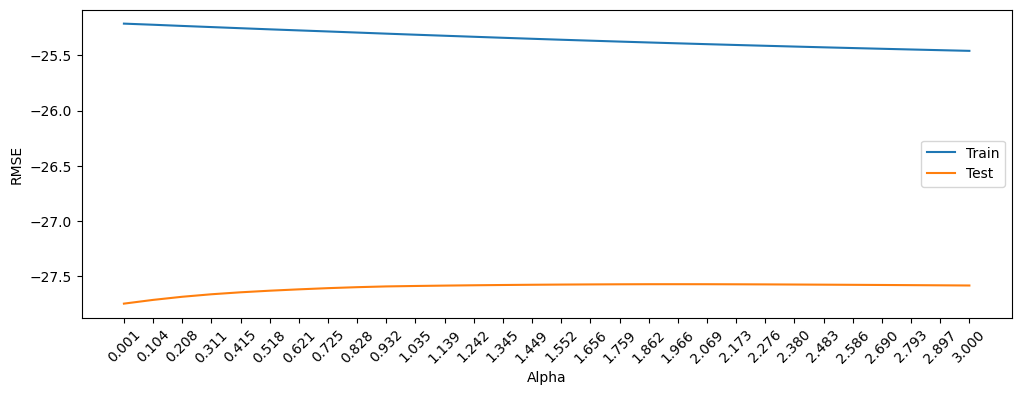

In [150]:
#Визуализируем изменение RMSE в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('RMSE') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

Оптимум при альфа примерно 1,2

In [151]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=1.2)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=ridge_lr_poly, #модель
    X=X_scaled_poly, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='neg_mean_absolute_error', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)
print('Среднее значение RMSE на тестовой выборке: {}'.format(cv_metrics['test_score'].mean()))

{'fit_time': array([0.00622106, 0.00398397, 0.00210214, 0.00381422, 0.00448608]),
 'score_time': array([0.00138903, 0.00154901, 0.00029993, 0.00050974, 0.0003109 ]),
 'test_score': array([-32.56831783, -26.31665128, -28.64090676, -26.1875371 ,
        -24.21178367]),
 'train_score': array([-25.12580688, -25.3349391 , -24.56249184, -25.65696613,
        -25.95803843])}

Среднее значение RMSE на тестовой выборке: -27.585039328079624


Улучшили метрику на 0,2 )))))

ВАЛИДАЦИЯ


In [154]:
X_test = pd.read_csv('test_only_smiles.csv')

Повторяем преобразования для тестовой валидационной выборки


In [155]:
#Трансформируем в объект молекулы SMILES
X_test['mol'] = X_test['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 

#Что мы получили - объект класса rdkit.Chem.rdchem.Mol
print(type(X_test['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


In [162]:
X_test['mol'] = X_test['mol'].apply(lambda x: Chem.AddHs(x))
X_test['num_of_atoms'] = X_test['mol'].apply(lambda x: x.GetNumAtoms())
X_test['num_of_heavy_atoms'] = X_test['mol'].apply(lambda x: x.GetNumHeavyAtoms())
number_of_atoms(['C','O', 'N', 'Cl'], X_test)
X_test['tpsa'] = X_test['mol'].apply(lambda x: Descriptors.TPSA(x))
X_test['mol_w'] = X_test['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
X_test['num_valence_electrons'] = X_test['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
X_test['num_heteroatoms'] = X_test['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
X_test = X_test.drop(columns=['mol'])
X_test = X_test.drop(columns=['num_of_heavy_atoms', 'num_valence_electrons'])
X_test = X_test.drop(columns=['num_of_atoms'])
needed_features = ['num_of_C_atoms', 'num_of_O_atoms', 'tpsa', 'mol_w', 'num_heteroatoms']
X = X_test[needed_features]
#Инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X_test_scaled = scaler.fit_transform(X)

KeyError: 'mol'

In [163]:
#Инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X_test_scaled = scaler.fit_transform(X)

In [164]:
y = train3['activity']


In [165]:
ridge_lr_poly.fit(X_scaled, y)
predicted_activity = ridge_lr_poly.predict(X_test_scaled)

In [166]:
predicted_activity

array([ 30.10602019,  47.32442344,  58.32238665,  36.08855777,
        34.37623897,  41.66344043,  53.93598162,  48.28707825,
        32.14669662,  35.07173501,  35.16954395,  35.83541616,
        34.80808241,  58.70635475,  41.86662601,  37.21830145,
        83.5435327 ,  42.98687422,  55.14489813,  34.45892773,
        37.11153406,  33.61660665,  42.83724932,  46.15615035,
        36.92679706,  31.99008092,  44.50061113,  51.08513617,
        44.27073307,  39.48169515,  35.21723074,  33.7136879 ,
        39.20399031,  41.26172442,  35.7136315 ,  46.94550424,
        43.01098597,  67.6567819 ,  37.00038678,  42.47279271,
        34.36726931,  35.05379695,  43.15766213,  39.44948814,
        42.80274082,  50.67693702,  39.21647712,  55.09972157,
        42.1503685 ,  39.42643144,  40.91966944,  44.77172937,
        57.79341545,  51.02819675,  32.76363512,  41.09380828,
        33.01257241,  34.11127785,  47.14411079,  60.58797602,
        44.20132667,  54.25296015,  37.10364697,  40.48

In [167]:
test_table_predicted = pd.read_csv('test_only_smiles.csv')


Создали и добавили в новую таблицу предсказания значений токсичности

In [168]:
test_table_predicted['activity'] = ridge_lr_poly.predict(X_test_scaled)